In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display_html
from itertools import chain,cycle
import yfinance as yf

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=df.to_html().replace('table','table style="display:inline-block"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

In [2]:
from lib.equity.fundamentals import Fundamentals, Ranks, DCF, Columns
from lib.equity.time_series import Technicals
from lib.equity.attribution import Attribution, FammaFrench, Brinson
from lib.fixed_income.rates import Treasuries
from lib.portfolio import drift_rebalancer as rebal
from lib.economy import activity as ecact

from calendar_dates import Calendar
cal = Calendar()


C:\dev\pynance\lib
C:\dev\pynance\lib


# Attribution

What factors are driving broader market returns?

In [3]:
atr = Attribution()
holdings = atr.get_holdings('XLF') #SPY
returns = atr.get_portfolio_returns()
portf_returns = returns.resample('M').sum()

Extracting: https://www.zacks.com/funds/etf/XLF/holding

1 Failed download:
- BRK.B: No data found, symbol may be delisted


## Famma French

In [4]:
ff = FammaFrench(model = 'ThreeFactors', portf_rets = portf_returns)
print(ff.summary)

                            OLS Regression Results                            
Dep. Variable:           portf_ex_rtn   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     36.93
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.15e-07
Time:                        18:09:15   Log-Likelihood:                -42.582
No. Observations:                  21   AIC:                             93.16
Df Residuals:                      17   BIC:                             97.34
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0375      0.478     -0.078      0.9

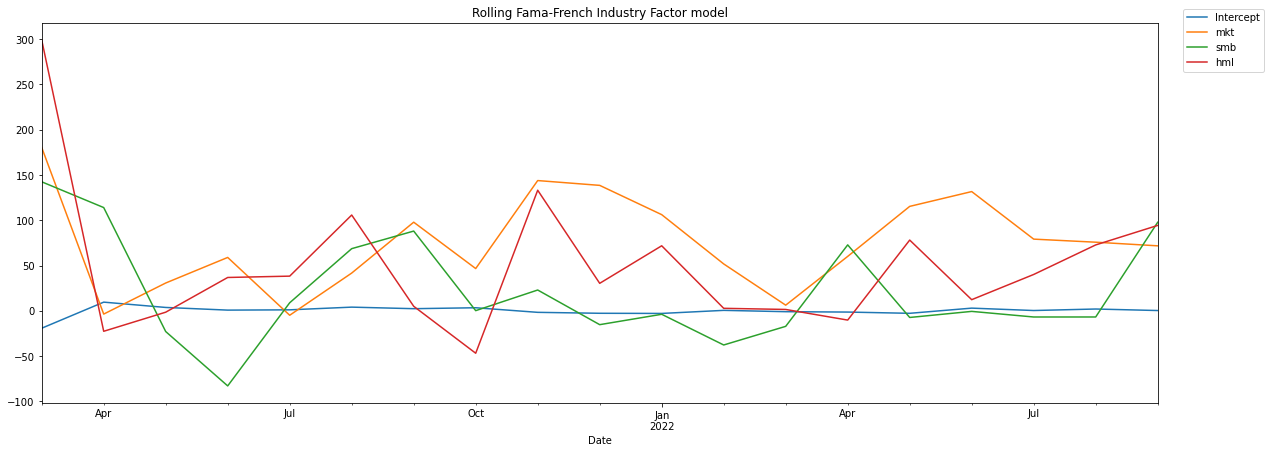

In [5]:
ff.plot()

In [6]:
ff = FammaFrench(model = 'IndustryFactors', portf_rets = portf_returns)
print(ff.summary)

                            OLS Regression Results                            
Dep. Variable:              portf_rtn   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     37.04
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           1.45e-06
Time:                        18:09:16   Log-Likelihood:                -25.557
No. Observations:                  21   AIC:                             73.11
Df Residuals:                      10   BIC:                             84.60
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1240      0.529      2.124      0.0

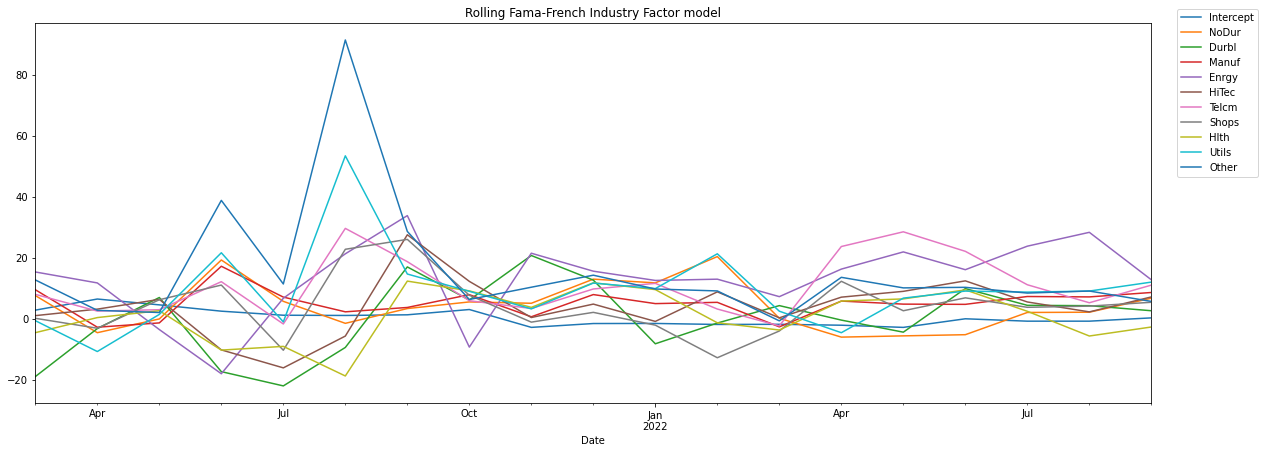

In [7]:
ff.plot()

## Brinson

In [8]:
...

Ellipsis

# Fundamentals

Fundamental Equity Analysis

In [9]:
ticker = ['JNJ']

In [10]:
rank = Ranks(ticker = ticker[0])
ranks = rank.get_ranks() 

In [11]:
fun = Fundamentals( ticker = ticker)
fun

<strong>Left Frame:</strong> Values as reported (in Millions, USD)<br>
<strong>Middle Frame:</strong> Percent Change <br>
<strong>Right Frame:</strong> Percentile Rank vs. Industry Peers (Higher values are assigned a lower percentile rank)<br>

In [12]:
x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.INCOME.value)

display_side_by_side(x, y, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 $23,338.0 
 $24,804.0 
 $23,426.0 
 $24,020.0 
 $23,791.0 
 
 
 cogs 
 $7,250.0 
 $7,955.0 
 $7,598.0 
 $7,919.0 
 $7,807.0 
 
 
 gp 
 $16,088.0 
 $16,849.0 
 $15,828.0 
 $16,101.0 
 $15,984.0 
 
 
 opex 
 $10,382.0 
 $11,957.0 
 $10,080.0 
 $10,014.0 
 $9,768.0 
 
 
 opinc 
 $5,706.0 
 $4,892.0 
 $5,748.0 
 $6,087.0 
 $6,216.0 
 
 
 ebt 
 $3,849.0 
 $4,836.0 
 $5,862.0 
 $5,840.0 
 $5,822.0 
 
 
 netinc 
 $3,667.0 
 $4,736.0 
 $5,149.0 
 $4,814.0 
 $4,458.0 
 
 
 ebitda 
 $5,683.0 
 $6,739.0 
 $7,641.0 
 $7,622.0 
 $7,558.0 
 
 
 depamor 
 $1,814.0 
 $1,843.0 
 $1,769.0 
 $1,744.0 
 $1,685.0 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 nan% 
 6.28% 
 -5.56% 
 2.54% 
 -0.95% 
 
 
 cogs 
 nan% 
 9.72% 
 -4.49% 
 4.22% 
 -1.41% 
 
 
 gp 
 nan% 
 4.73% 
 -6.06% 
 1.72% 
 -0.73% 
 
 
 opex 
 nan% 
 15.17% 
 -15.70% 
 -0.65% 
 -2.46% 
 
 
 opinc 
 nan% 
 -14.27% 
 17.50% 
 5.90% 
 2.12% 
 
 
 ebt 
 nan% 
 25.64% 
 21.22% 
 -0.38% 
 -0.31% 
 
 
 netinc 
 nan% 
 29.15% 
 8.72% 
 -6.51% 
 -7.40% 
 
 
 ebitda 
 nan% 
 18.58% 
 13.38% 
 -0.25% 
 -0.84% 
 
 
 depamor 
 nan% 
 1.60% 
 -4.02% 
 -1.41% 
 -3.38% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 12% 
 12% 
 12% 
 18% 
 25% 
 
 
 cogs 
 12% 
 18% 
 12% 
 18% 
 25% 
 
 
 gp 
 6% 
 12% 
 6% 
 18% 
 25% 
 
 
 opex 
 6% 
 12% 
 6% 
 12% 
 25% 
 
 
 opinc 
 12% 
 18% 
 12% 
 18% 
 25% 
 
 
 ebt 
 19% 
 18% 
 12% 
 18% 
 25% 
 
 
 netinc 
 19% 
 18% 
 12% 
 18% 
 25% 
 
 
 ebitda 
 38% 
 18% 
 12% 
 18% 
 25% 
 
 
 depamor 
 38% 
 29% 
 25% 
 29% 
 75%

In [13]:
x = fun.get( columns = Columns.CASHFLOW.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.CASHFLOW.value)

display_side_by_side(x, y, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 cashneq 
 $17,604.0 
 $14,487.0 
 $10,463.0 
 $10,983.0 
 $11,355.0 
 
 
 netinc 
 $3,667.0 
 $4,736.0 
 $5,149.0 
 $4,814.0 
 $4,458.0 
 
 
 depamor 
 $1,814.0 
 $1,843.0 
 $1,769.0 
 $1,744.0 
 $1,685.0 
 
 
 opex 
 $10,382.0 
 $11,957.0 
 $10,080.0 
 $10,014.0 
 $9,768.0 
 
 
 receivables 
 $14,911.0 
 $15,283.0 
 $15,594.0 
 $16,139.0 
 $15,890.0 
 
 
 payables 
 $8,961.0 
 $11,055.0 
 $9,309.0 
 $9,765.0 
 $10,153.0 
 
 
 inventory 
 $10,387.0 
 $10,387.0 
 $10,990.0 
 $11,437.0 
 $11,675.0 
 
 
 ncfo 
 $8,290.0 
 $5,732.0 
 $3,979.0 
 $5,581.0 
 $6,284.0 
 
 
 ncfbus 
 $12.0 
 $-15.0 
 $-4.0 
 $-205.0 
 $9.0 
 
 
 ncfi 
 $-2,719.0 
 $-5,360.0 
 $-3,634.0 
 $-2,639.0 
 $-1,701.0 
 
 
 ncfinv 
 $-1,968.0 
 $-3,836.0 
 $-2,964.0 
 $-1,460.0 
 $-720.0 
 
 
 ncfdiv 
 $-2,791.0 
 $-2,791.0 
 $-2,787.0 
 $-2,971.0 
 $-2,970.0 
 
 
 ncfx 
 $-92.0 
 $-53.0 
 $16.0 
 $-161.0 
 $-286.0 
 
 
 ncff 
 $-2,207.0 
 $-3,436.0 
 $-4,385.0 
 $-2,261.0 
 $-3,925.0 
 
 
 fcf 
 $7,543.0 
 $4,317.0 
 $3,372.0 
 $4,718.0 
 $5,332.0 
 
 
 ncf 
 $3,272.0 
 $-3,117.0 
 $-4,024.0 
 $520.0 
 $372.0 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 cashneq 
 nan% 
 -17.71% 
 -27.78% 
 4.97% 
 3.39% 
 
 
 netinc 
 nan% 
 29.15% 
 8.72% 
 -6.51% 
 -7.40% 
 
 
 depamor 
 nan% 
 1.60% 
 -4.02% 
 -1.41% 
 -3.38% 
 
 
 opex 
 nan% 
 15.17% 
 -15.70% 
 -0.65% 
 -2.46% 
 
 
 receivables 
 nan% 
 2.49% 
 2.03% 
 3.49% 
 -1.54% 
 
 
 payables 
 nan% 
 23.37% 
 -15.79% 
 4.90% 
 3.97% 
 
 
 inventory 
 nan% 
 0.00% 
 5.81% 
 4.07% 
 2.08% 
 
 
 ncfo 
 nan% 
 -30.86% 
 -30.58% 
 40.26% 
 12.60% 
 
 
 ncfbus 
 nan% 
 -225.00% 
 73.33% 
 -5,025.00% 
 104.39% 
 
 
 ncfi 
 nan% 
 -97.13% 
 32.20% 
 27.38% 
 35.54% 
 
 
 ncfinv 
 nan% 
 -94.92% 
 22.73% 
 50.74% 
 50.68% 
 
 
 ncfdiv 
 nan% 
 -0.00% 
 0.14% 
 -6.60% 
 0.03% 
 
 
 ncfx 
 nan% 
 42.39% 
 130.19% 
 -1,106.25% 
 -77.64% 
 
 
 ncff 
 nan% 
 -55.69% 
 -27.62% 
 48.44% 
 -73.60% 
 
 
 fcf 
 nan% 
 -42.77% 
 -21.89% 
 39.92% 
 13.01% 
 
 
 ncf 
 nan% 
 -195.26% 
 -29.10% 
 112.92% 
 -28.46% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 cashneq 
 6% 
 6% 
 25% 
 6% 
 25% 
 
 
 netinc 
 19% 
 18% 
 12% 
 18% 
 25% 
 
 
 depamor 
 38% 
 29% 
 25% 
 29% 
 75% 
 
 
 opex 
 6% 
 12% 
 6% 
 12% 
 25% 
 
 
 receivables 
 6% 
 6% 
 6% 
 6% 
 25% 
 
 
 payables 
 25% 
 24% 
 25% 
 24% 
 25% 
 
 
 inventory 
 12% 
 6% 
 6% 
 6% 
 25% 
 
 
 ncfo 
 19% 
 18% 
 25% 
 18% 
 25% 
 
 
 ncfbus 
 12% 
 71% 
 56% 
 76% 
 25% 
 
 
 ncfi 
 88% 
 94% 
 100% 
 88% 
 75% 
 
 
 ncfinv 
 94% 
 94% 
 94% 
 82% 
 100% 
 
 
 ncfdiv 
 100% 
 100% 
 88% 
 100% 
 100% 
 
 
 ncfx 
 100% 
 82% 
 12% 
 94% 
 100% 
 
 
 ncff 
 81% 
 82% 
 75% 
 76% 
 50% 
 
 
 fcf 
 25% 
 24% 
 38% 
 24% 
 25% 
 
 
 ncf 
 25% 
 94% 
 100% 
 29% 
 75%

In [14]:
x = fun.get( columns = Columns.BALANCE.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.BALANCE.value)

display_side_by_side(x, y, z)

calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 assetsc 
 $59,889.0 
 $60,979.0 
 $60,424.0 
 $63,847.0 
 $65,236.0 
 
 
 assetsnc 
 $119,339.0 
 $121,039.0 
 $117,931.0 
 $113,877.0 
 $109,888.0 
 
 
 receivables 
 $14,911.0 
 $15,283.0 
 $15,594.0 
 $16,139.0 
 $15,890.0 
 
 
 inventory 
 $10,387.0 
 $10,387.0 
 $10,990.0 
 $11,437.0 
 $11,675.0 
 
 
 assets 
 $179,228.0 
 $182,018.0 
 $178,355.0 
 $177,724.0 
 $175,124.0 
 
 
 liabilitiesc 
 $44,561.0 
 $45,226.0 
 $43,390.0 
 $44,821.0 
 $45,543.0 
 
 
 liabilitiesnc 
 $64,395.0 
 $62,769.0 
 $60,256.0 
 $56,546.0 
 $54,982.0 
 
 
 payables 
 $8,961.0 
 $11,055.0 
 $9,309.0 
 $9,765.0 
 $10,153.0 
 
 
 debt 
 $33,928.0 
 $33,751.0 
 $33,148.0 
 $32,597.0 
 $32,027.0 
 
 
 equity 
 $70,272.0 
 $74,023.0 
 $74,709.0 
 $76,357.0 
 $74,599.0 
 
 
 retearn 
 $121,092.0 
 $123,060.0 
 $124,380.0 
 $126,216.0 
 $127,917.0 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 assetsc 
 nan% 
 1.82% 
 -0.91% 
 5.66% 
 2.18% 
 
 
 assetsnc 
 nan% 
 1.42% 
 -2.57% 
 -3.44% 
 -3.50% 
 
 
 receivables 
 nan% 
 2.49% 
 2.03% 
 3.49% 
 -1.54% 
 
 
 inventory 
 nan% 
 0.00% 
 5.81% 
 4.07% 
 2.08% 
 
 
 assets 
 nan% 
 1.56% 
 -2.01% 
 -0.35% 
 -1.46% 
 
 
 liabilitiesc 
 nan% 
 1.49% 
 -4.06% 
 3.30% 
 1.61% 
 
 
 liabilitiesnc 
 nan% 
 -2.53% 
 -4.00% 
 -6.16% 
 -2.77% 
 
 
 payables 
 nan% 
 23.37% 
 -15.79% 
 4.90% 
 3.97% 
 
 
 debt 
 nan% 
 -0.52% 
 -1.79% 
 -1.66% 
 -1.75% 
 
 
 equity 
 nan% 
 5.34% 
 0.93% 
 2.21% 
 -2.30% 
 
 
 retearn 
 nan% 
 1.63% 
 1.07% 
 1.48% 
 1.35% 
 
 
 
 
 
 
 
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 assetsc 
 6% 
 6% 
 6% 
 12% 
 25% 
 
 
 assetsnc 
 19% 
 12% 
 12% 
 18% 
 25% 
 
 
 receivables 
 6% 
 6% 
 6% 
 6% 
 25% 
 
 
 inventory 
 12% 
 6% 
 6% 
 6% 
 25% 
 
 
 assets 
 6% 
 6% 
 12% 
 12% 
 25% 
 
 
 liabilitiesc 
 6% 
 6% 
 6% 
 12% 
 25% 
 
 
 liabilitiesnc 
 12% 
 12% 
 19% 
 18% 
 25% 
 
 
 payables 
 25% 
 24% 
 25% 
 24% 
 25% 
 
 
 debt 
 38% 
 24% 
 38% 
 29% 
 50% 
 
 
 equity 
 12% 
 12% 
 12% 
 12% 
 25% 
 
 
 retearn 
 19% 
 18% 
 12% 
 18% 
 50%

## Peers

Selected ticker vs Industry Peers

Drug Manufacturers - General


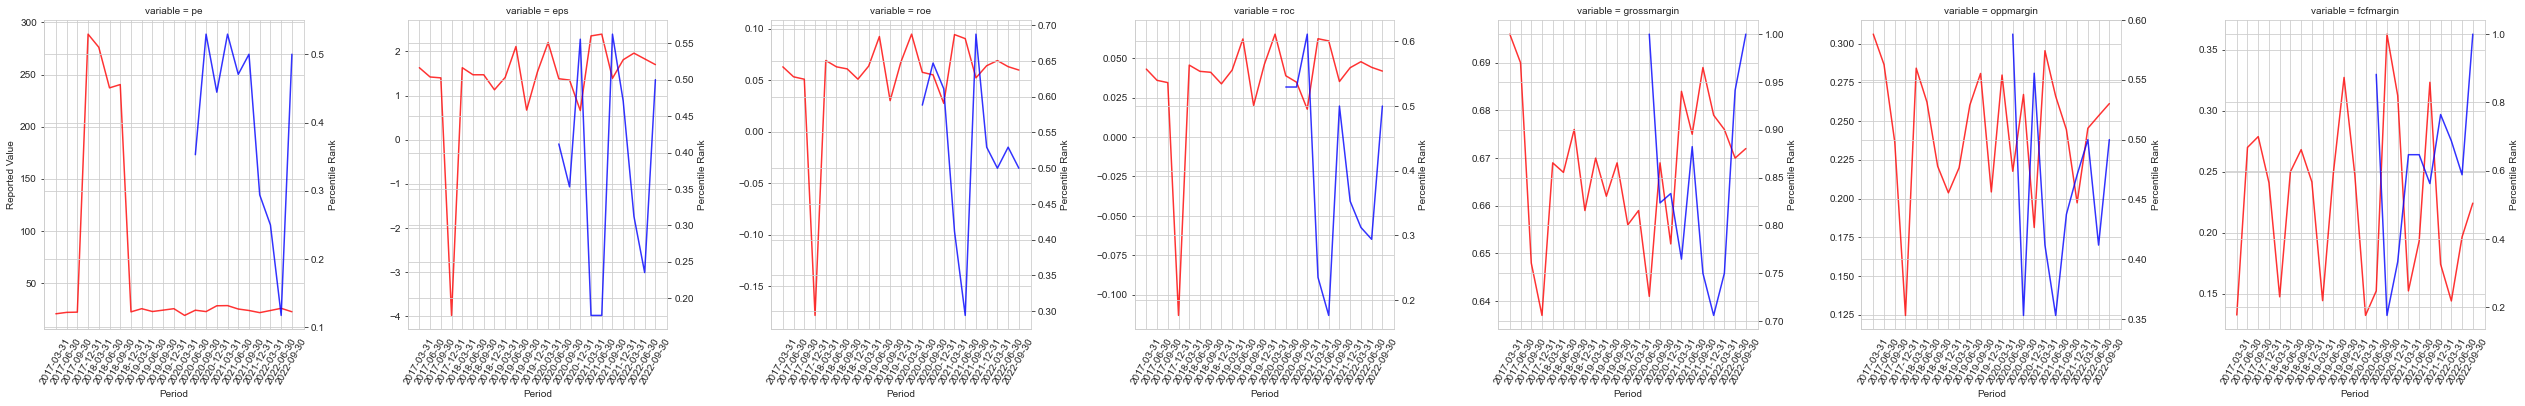

In [15]:
rank.plot_dual_axis_ranks(fun, cols = ['ticker', 'calendardate','pe','eps','roe','roc','grossmargin', 'oppmargin','fcfmargin'])

Drug Manufacturers - General


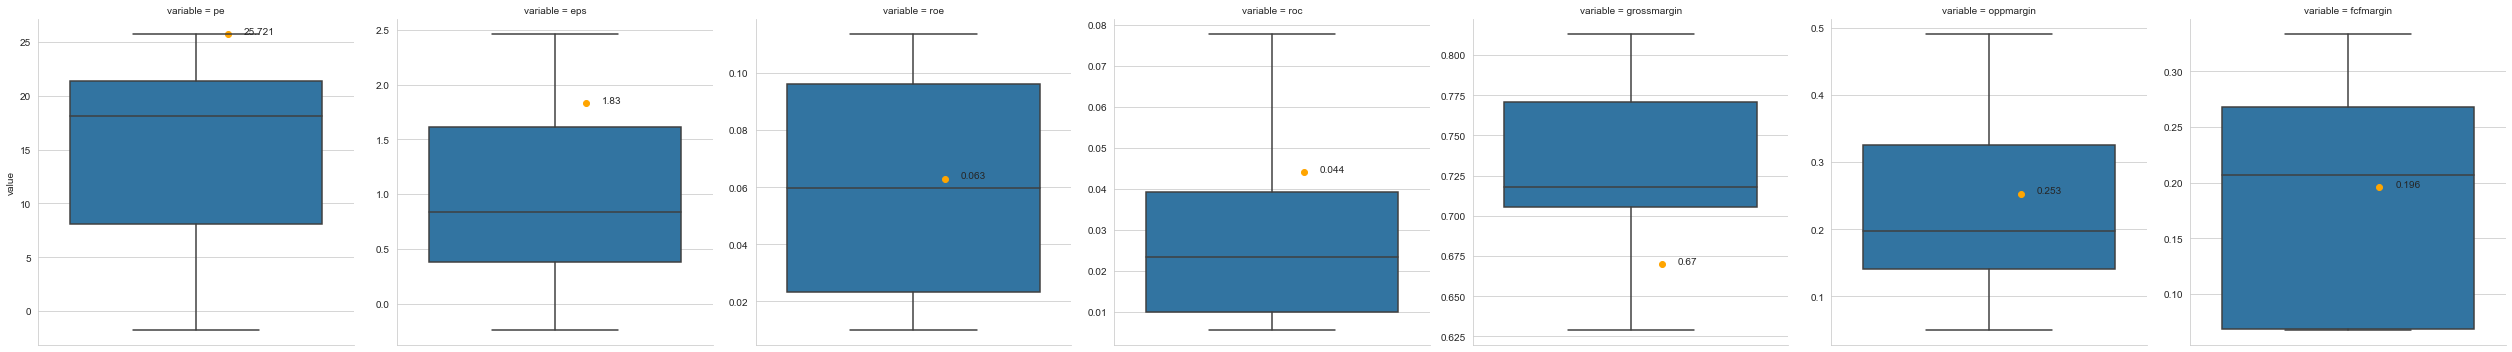

In [16]:
fun.plot_box_plot(cols = ['pe','eps','roe','roc','grossmargin', 'oppmargin','fcfmargin'])

In [17]:
peers = fun.get_peers()
fun = Fundamentals(ticker = peers)
print(fun)

x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.get( columns = Columns.PEERS.value, limit = 5 ).style_jupyter(fun.df, units = '%')
z = fun.get( columns = Columns.CASHFLOW_.value, limit = 5 ).style_jupyter(fun.df)

display_side_by_side(x,y,z)

Drug Manufacturers - General
Fundamentals:Object:['JNJ', 'PFE', 'MRK', 'ABBV']


calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 revenue 
 ABBV 
 $14,342 
 $14,886 
 $13,538 
 $14,583 
 $nan 
 
 
 JNJ 
 $23,338 
 $24,804 
 $23,426 
 $24,020 
 $23,791 
 
 
 MRK 
 $13,154 
 $13,521 
 $15,901 
 $14,593 
 $nan 
 
 
 PFE 
 $24,094 
 $23,635 
 $25,661 
 $27,742 
 $nan 
 
 
 cogs 
 ABBV 
 $4,390 
 $4,320 
 $4,052 
 $4,170 
 $nan 
 
 
 JNJ 
 $7,250 
 $7,955 
 $7,598 
 $7,919 
 $7,807 
 
 
 MRK 
 $3,450 
 $3,874 
 $5,380 
 $4,216 
 $nan 
 
 
 PFE 
 $9,973 
 $9,589 
 $9,984 
 $8,648 
 $nan 
 
 
 gp 
 ABBV 
 $9,952 
 $10,566 
 $9,486 
 $10,413 
 $nan 
 
 
 JNJ 
 $16,088 
 $16,849 
 $15,828 
 $16,101 
 $15,984 
 
 
 MRK 
 $9,704 
 $9,647 
 $10,521 
 $10,377 
 $nan 
 
 
 PFE 
 $14,121 
 $14,046 
 $15,677 
 $19,094 
 $nan 
 
 
 opex 
 ABBV 
 $5,646 
 $5,492 
 $4,769 
 $7,118 
 $nan 
 
 
 JNJ 
 $10,382 
 $11,957 
 $10,080 
 $10,014 
 $9,768 
 
 
 MRK 
 $4,888 
 $6,072 
 $4,952 
 $5,452 
 $nan 
 
 
 PFE 
 $6,283 
 $9,864 
 $6,626 
 $7,647 
 $nan 
 
 
 opinc 
 ABBV 
 $4,306 
 $5,074 
 $4,717 
 $3,295 
 $nan 
 
 
 JNJ 
 $5,706 
 $4,892 
 $5,748 
 $6,087 
 $6,216 
 
 
 MRK 
 $4,816 
 $3,575 
 $5,569 
 $4,925 
 $nan 
 
 
 PFE 
 $7,838 
 $4,182 
 $9,051 
 $11,447 
 $nan 
 
 
 ebt 
 ABBV 
 $3,687 
 $4,270 
 $4,926 
 $1,179 
 $nan 
 
 
 JNJ 
 $3,849 
 $4,836 
 $5,862 
 $5,840 
 $5,822 
 
 
 MRK 
 $5,262 
 $3,843 
 $4,864 
 $4,482 
 $nan 
 
 
 PFE 
 $7,816 
 $3,728 
 $9,036 
 $11,475 
 $nan 
 
 
 netinc 
 ABBV 
 $3,179 
 $4,044 
 $4,490 
 $924 
 $nan 
 
 
 JNJ 
 $3,667 
 $4,736 
 $5,149 
 $4,814 
 $4,458 
 
 
 MRK 
 $4,567 
 $3,758 
 $4,310 
 $3,944 
 $nan 
 
 
 PFE 
 $8,147 
 $3,394 
 $7,864 
 $9,905 
 $nan 
 
 
 ebitda 
 ABBV 
 $6,399 
 $6,820 
 $7,518 
 $3,763 
 $nan 
 
 
 JNJ 
 $5,683 
 $6,739 
 $7,641 
 $7,622 
 $7,558 
 
 
 MRK 
 $6,021 
 $4,678 
 $5,984 
 $5,420 
 $nan 
 
 
 PFE 
 $9,176 
 $5,005 
 $10,223 
 $12,650 
 $nan 
 
 
 depamor 
 ABBV 
 $2,127 
 $1,979 
 $2,053 
 $2,052 
 $nan 
 
 
 JNJ 
 $1,814 
 $1,843 
 $1,769 
 $1,744 
 $1,685 
 
 
 MRK 
 $759 
 $835 
 $1,120 
 $938 
 $nan 
 
 
 PFE 
 $1,360 
 $1,277 
 $1,187 
 $1,175 
 $nan 
 
 
 
 
 
 
 
   
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 divyield 
 ABBV 
 4.70% 
 3.80% 
 3.30% 
 3.50% 
 nan% 
 
 
 JNJ 
 2.60% 
 2.40% 
 2.40% 
 2.40% 
 2.70% 
 
 
 MRK 
 3.50% 
 3.40% 
 3.30% 
 3.00% 
 nan% 
 
 
 PFE 
 3.60% 
 2.60% 
 3.00% 
 3.00% 
 nan% 
 
 
 grossmargin 
 ABBV 
 69.40% 
 71.00% 
 70.10% 
 71.40% 
 nan% 
 
 
 JNJ 
 68.90% 
 67.90% 
 67.60% 
 67.00% 
 67.20% 
 
 
 MRK 
 73.80% 
 71.30% 
 66.20% 
 71.10% 
 nan% 
 
 
 PFE 
 58.60% 
 59.40% 
 61.10% 
 68.80% 
 nan% 
 
 
 netmargin 
 ABBV 
 69.39% 
 70.98% 
 70.07% 
 71.41% 
 nan% 
 
 
 JNJ 
 68.93% 
 67.93% 
 67.57% 
 67.03% 
 67.19% 
 
 
 MRK 
 73.77% 
 71.35% 
 66.17% 
 71.11% 
 nan% 
 
 
 PFE 
 58.61% 
 59.43% 
 61.09% 
 68.83% 
 nan% 
 
 
 fcfmargin 
 ABBV 
 53.81% 
 32.84% 
 35.06% 
 33.34% 
 nan% 
 
 
 JNJ 
 32.32% 
 17.40% 
 14.39% 
 19.64% 
 22.41% 
 
 
 MRK 
 27.56% 
 28.27% 
 23.75% 
 21.74% 
 nan% 
 
 
 PFE 
 42.35% 
 20.82% 
 22.98% 
 26.74% 
 nan% 
 
 
 oppmargin 
 ABBV 
 30.02% 
 34.09% 
 34.84% 
 22.59% 
 nan% 
 
 
 JNJ 
 24.45% 
 19.72% 
 24.54% 
 25.34% 
 26.13% 
 
 
 MRK 
 36.61% 
 26.44% 
 35.02% 
 33.75% 
 nan% 
 
 
 PFE 
 32.53% 
 17.69% 
 35.27% 
 41.26% 
 nan% 
 
 
 roe 
 ABBV 
 23.46% 
 26.25% 
 27.57% 
 6.31% 
 nan% 
 
 
 JNJ 
 5.22% 
 6.40% 
 6.89% 
 6.30% 
 5.98% 
 
 
 MRK 
 12.76% 
 9.84% 
 10.54% 
 9.12% 
 nan% 
 
 
 PFE 
 10.76% 
 4.40% 
 9.54% 
 11.36% 
 nan% 
 
 
 roic 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 ros 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 


## DCF

In [18]:
fun = Fundamentals( ticker = ticker)

## Base Case

In [19]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.025)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.05)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.009980846223882
wacc:  0.028522826035548548
npv:  23785729439.806515
terminal value:  173923379504.01547
pv future cash flows:  75.1980149094446


## Bull

In [20]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.06)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.06)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099820008574472
wacc:  0.02858663366220043
npv:  26326700815.80286
terminal value:  207160189748.7472
pv future cash flows:  88.80597748696464


## Bear

In [21]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.01)
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.02)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099808294502581
wacc:  0.02849802367898485
npv:  22765011621.113434
terminal value:  157099962772.5339
pv future cash flows:  68.41105651830924


# Technicals

In [22]:
tech = Technicals()

[*********************100%***********************]  1 of 1 completed
Adj Close    174.869995
Name: 2022-10-28 00:00:00, dtype: float64


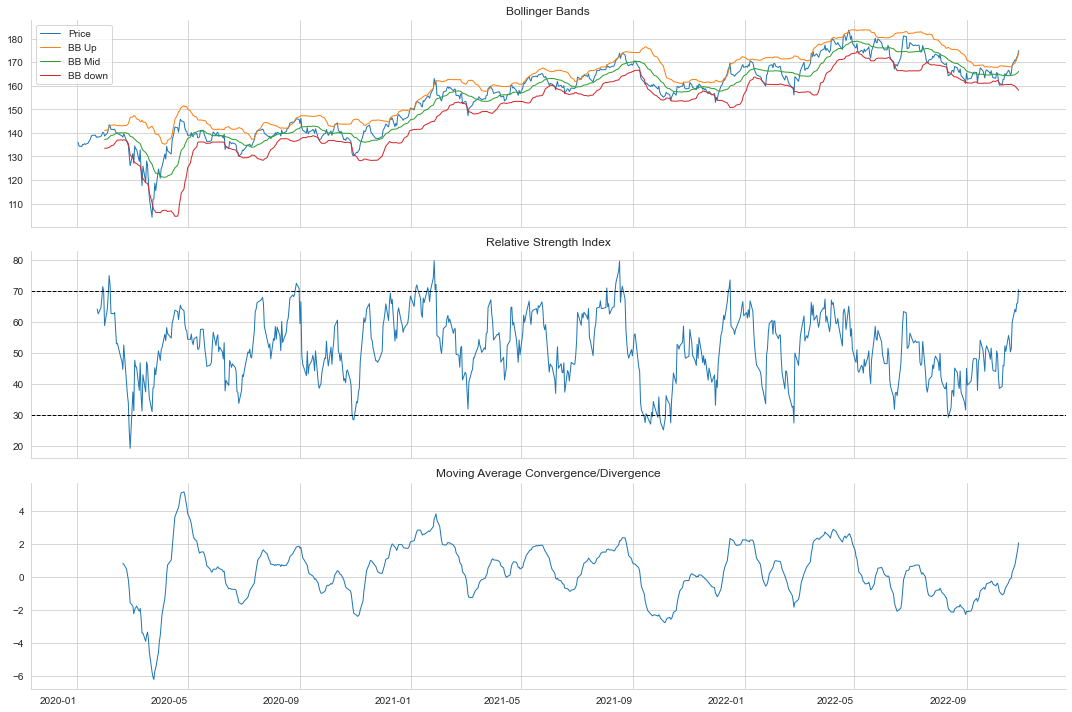

In [23]:
tech.ta_dashboard(fun)

# Rates

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,6)

In [25]:
ust = Treasuries(years = ['2021', '2022'])

In [26]:
ust.df.tail()

1 Month  2 Month  3 Month  6 Month  1 Year  2 Year  3 Year  \
date                                                                     
2022-10-28     3.75     3.95     4.18     4.51    4.55    4.41    4.38   
2022-10-31     3.73     4.00     4.22     4.57    4.66    4.51    4.45   
2022-11-01     3.72     4.00     4.23     4.58    4.75    4.54    4.48   
2022-11-02     3.70     4.01     4.22     4.57    4.76    4.61    4.54   
2022-11-03     3.75     4.04     4.25     4.57    4.78    4.71    4.63   

            5 Year  7 Year  10 Year  20 Year  30 Year  
date                                                   
2022-10-28    4.19    4.10     4.02     4.38     4.15  
2022-10-31    4.27    4.18     4.10     4.44     4.22  
2022-11-01    4.27    4.18     4.07     4.37     4.14  
2022-11-02    4.30    4.20     4.10     4.41     4.15  
2022-11-03    4.36    4.26     4.14     4.42     4.18

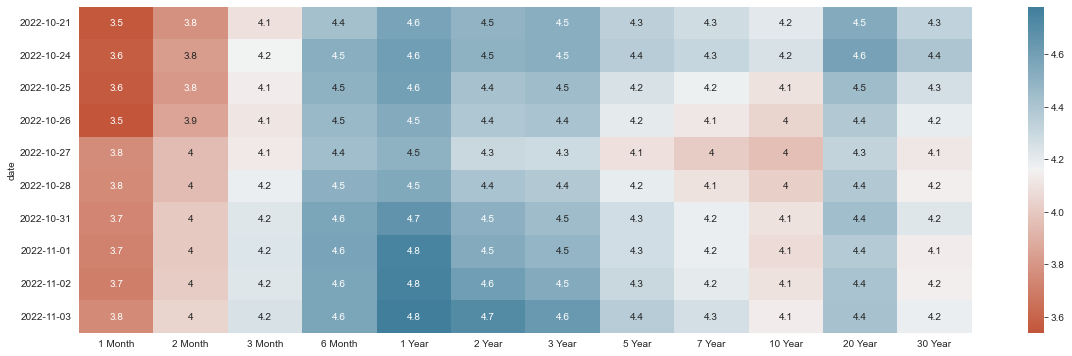

In [27]:
ust.rates_map()

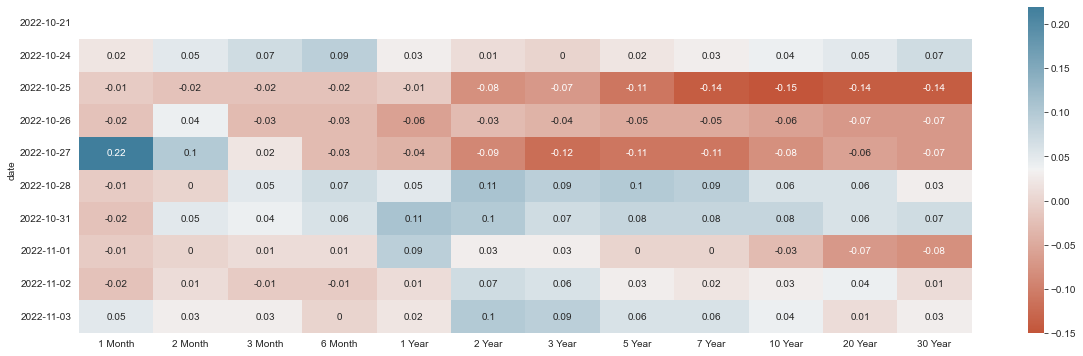

In [28]:
ust.rates_change_map()

1 Month  2 Month  3 Month  6 Month  1 Year  2 Year  3 Year  \
Change Since                                                               
60 days          1.51     1.61     1.60     1.44    1.52    1.48    1.50   
20 days          0.70     0.70     0.79     0.53    0.59    0.48    0.39   
10 days          0.20     0.26     0.16     0.14    0.20    0.22    0.11   
5 days           0.00     0.09     0.07     0.06    0.23    0.30    0.25   

              5 Year  7 Year  10 Year  20 Year  30 Year  
Change Since                                             
60 days         1.43    1.40     1.36     1.15     1.14  
20 days         0.31    0.31     0.31     0.34     0.37  
10 days         0.02   -0.02    -0.07    -0.12    -0.15  
5 days          0.17    0.16     0.12     0.04     0.03

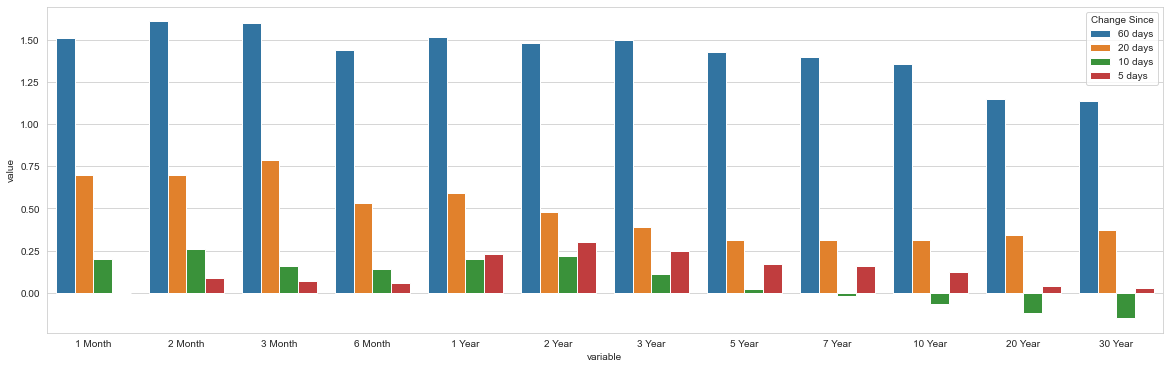

In [29]:
ust.change_since()

## Bootstrapping spot rates

In [30]:
zeroes, forwards = ust.build_zero_curve()

[3.7053351  4.06422235 4.31424086 4.59397626 4.69669859 4.67394378
 4.56249779 4.45124313 4.35952593 4.28741949 4.23092794 4.14996877]


In [31]:
zeroes

array([3.71998266, 4.04779198, 4.29294949, 4.59597502, 4.72638458,
       4.71470339, 4.56844468, 4.41725594, 4.30561334, 4.24076445,
       4.21583123, 4.24430324])

In [32]:
forwards

array([4.47030879, 4.89860172, 5.13031575, 5.20613917, 5.00003164,
       4.38064012, 3.92422404, 3.74396911, 3.77894728, 3.93817559,
       4.14818221, 4.55406933])

[*********************100%***********************]  4 of 4 completed


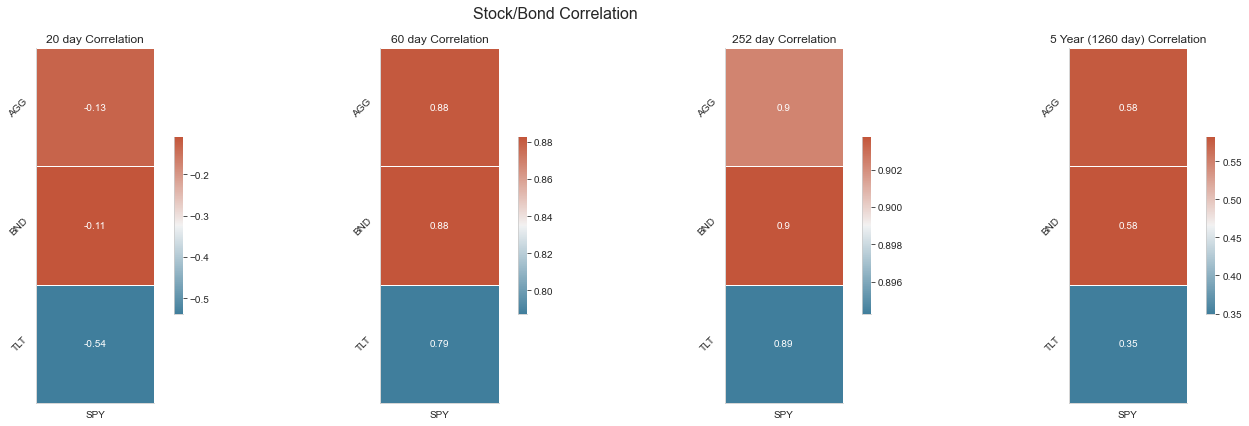

In [33]:
data = yf.download(f"TLT AGG BND SPY", start="2015-01-01", end=cal.today())['Adj Close']
ust.market_correlations(data, title = 'Stock/Bond Correlation')

[*********************100%***********************]  4 of 4 completed


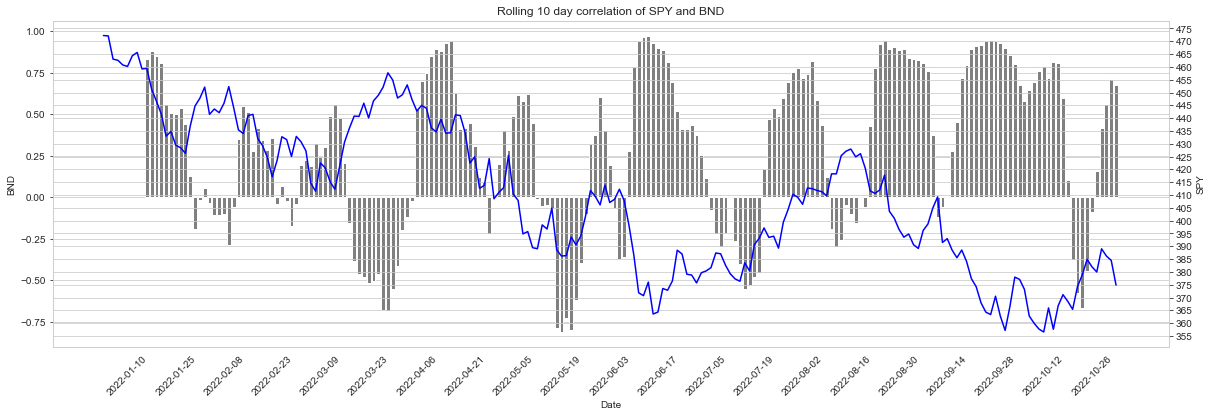

In [34]:
ust.stock_bond_correlation()

[*********************100%***********************]  1 of 1 completed


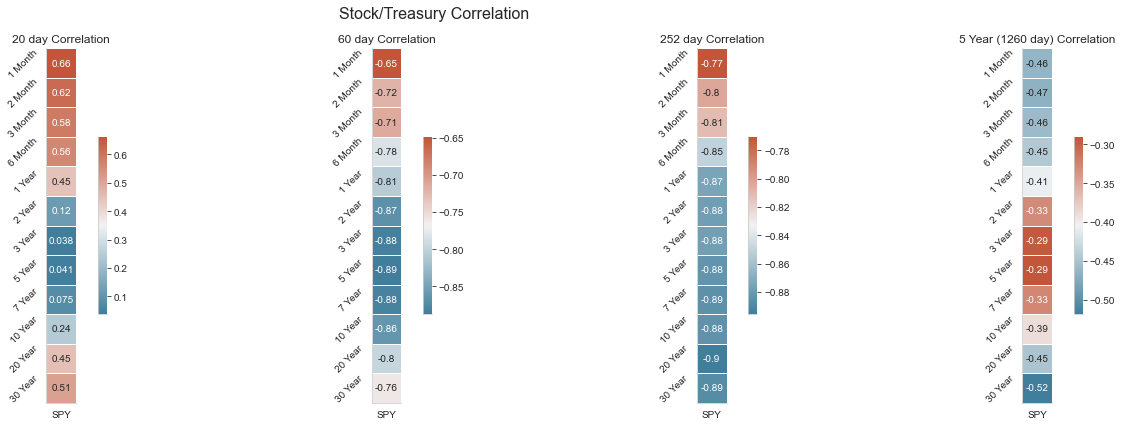

In [35]:
ust.stock_treasury_correlation()

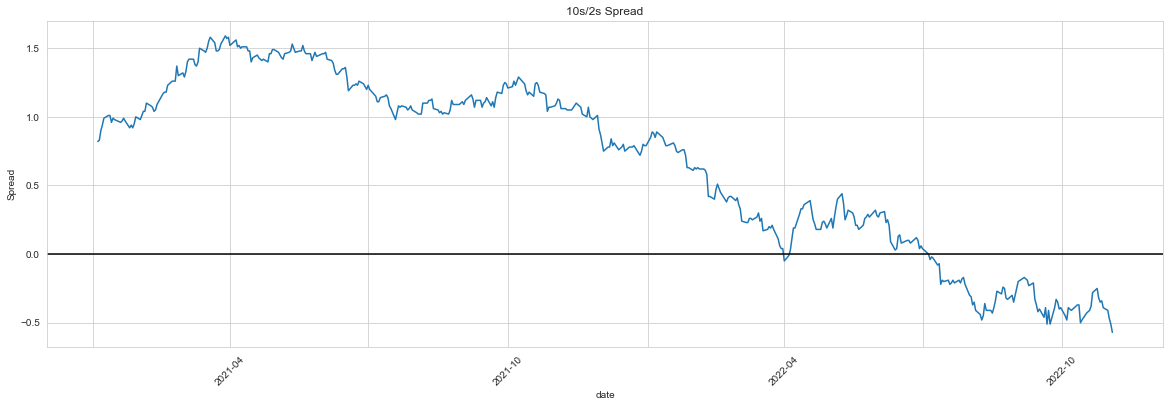

In [36]:
ust.tens_twos_spread()

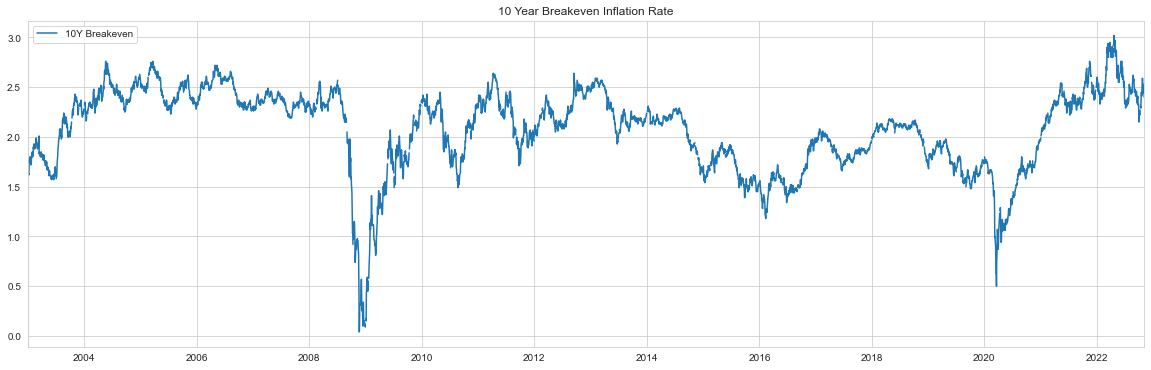

In [37]:
ust.breakeven_inflation()

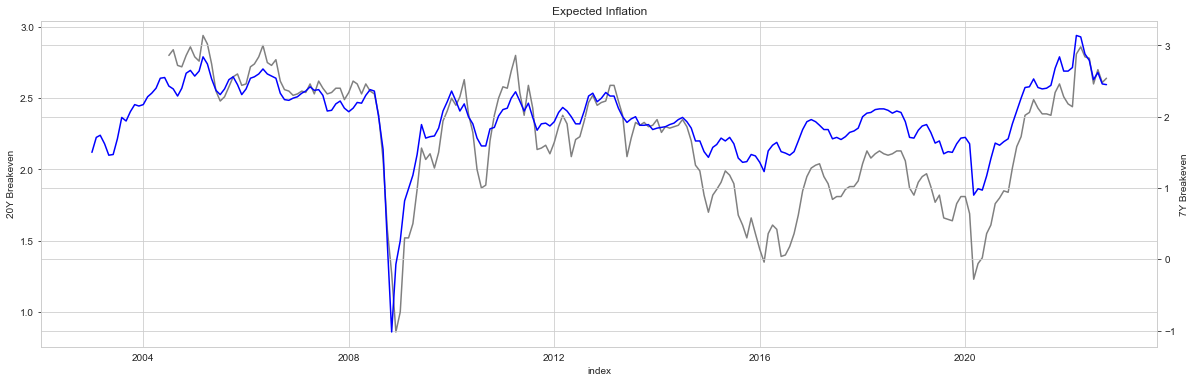

In [38]:
ust.expected_inflation()

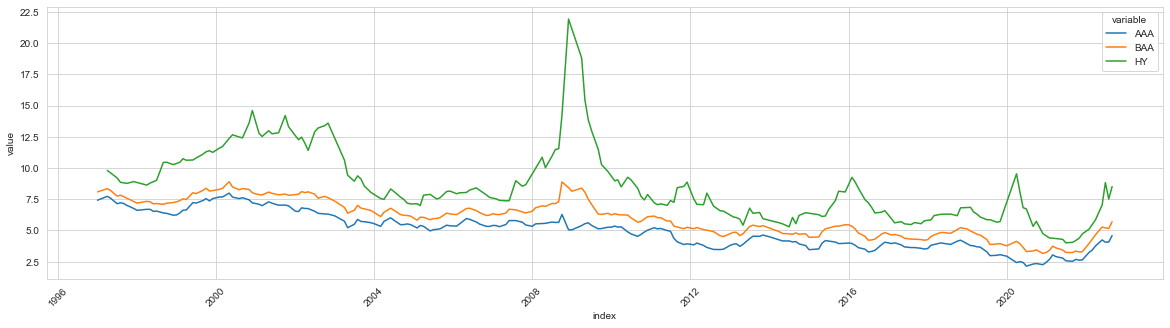

In [39]:
ust.credit_spreads()

# Economic Activity

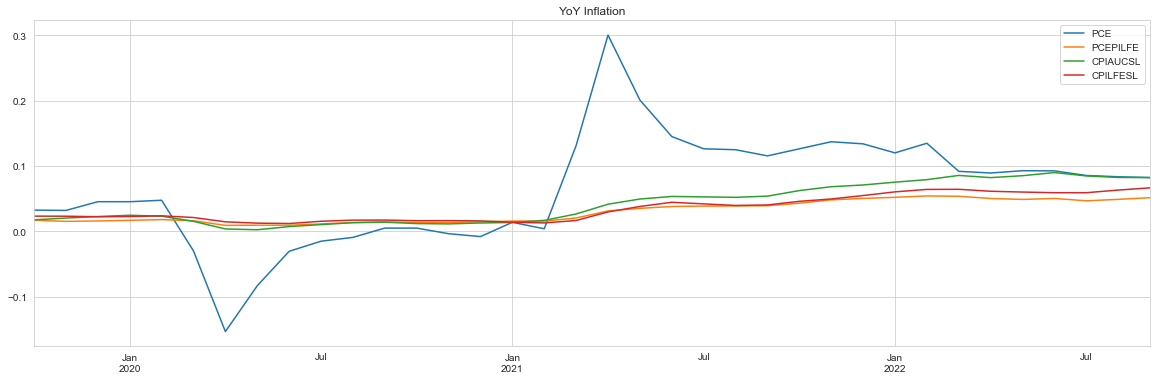

In [40]:
ecact.inflation()

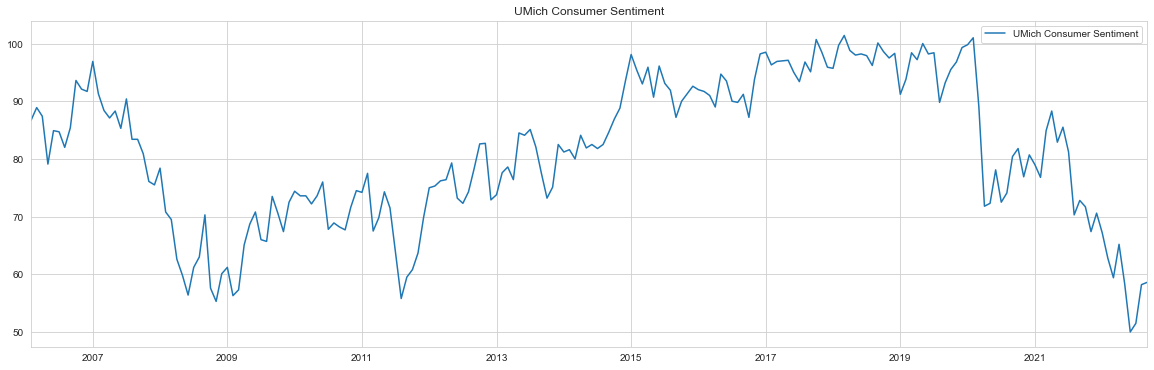

In [41]:
ecact.consumer_sentiment()

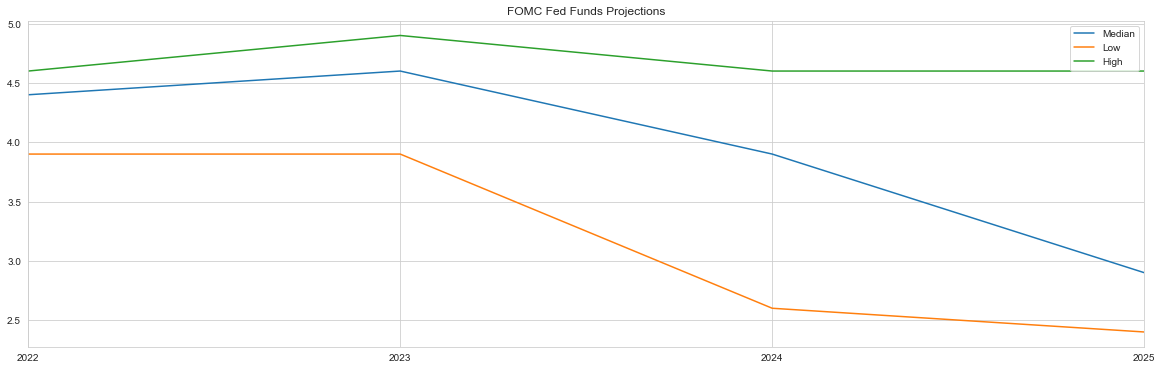

In [42]:
ecact.fomc_projections()

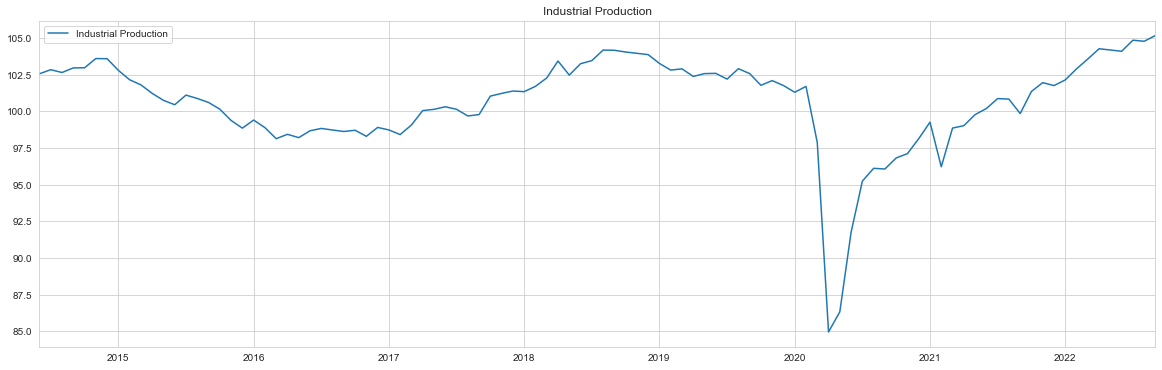

In [43]:
ecact.industrial_prod()

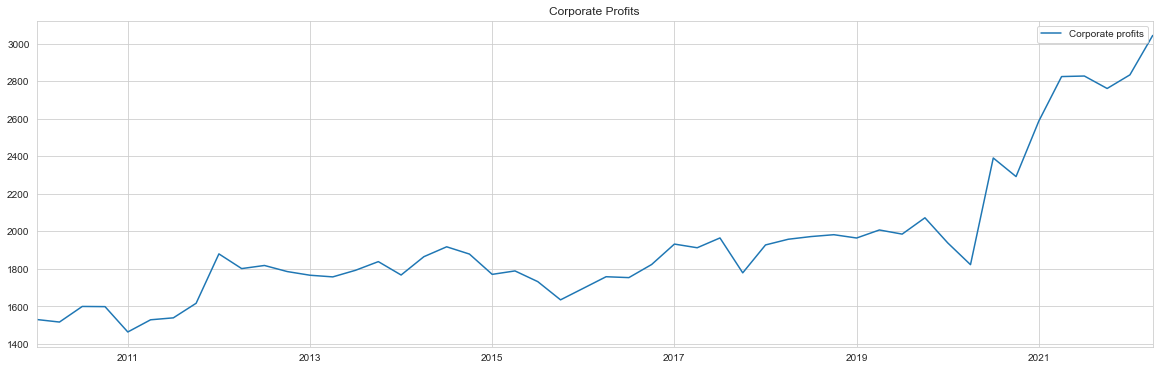

In [44]:
ecact.corporate_profits()

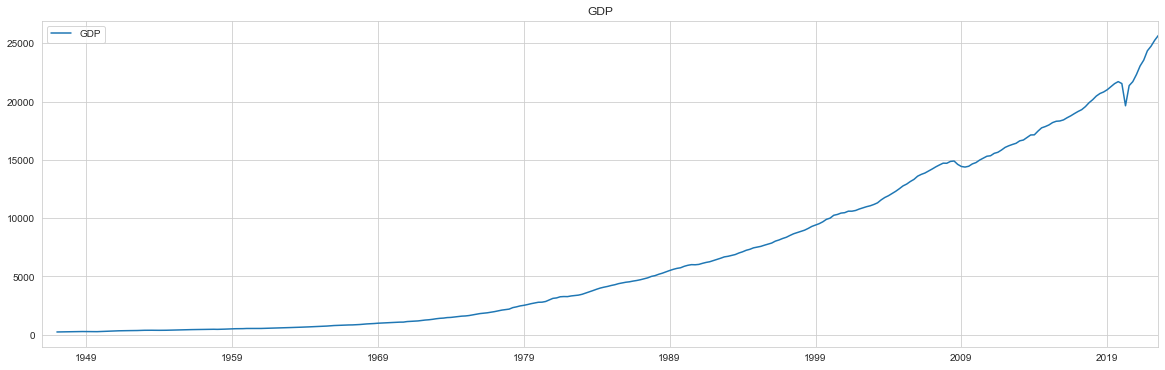

In [45]:
ecact.gdp()

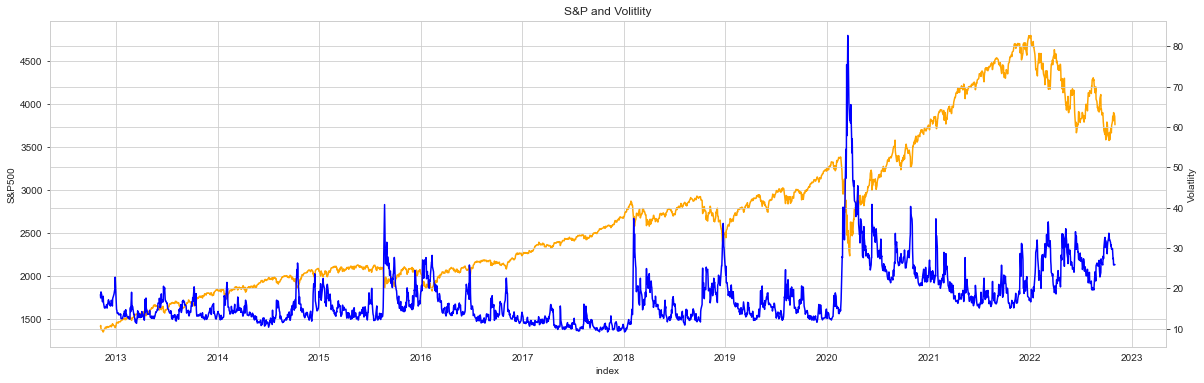

In [46]:
ecact.spy_and_vol()

# Rebalance

In [47]:
# portfolio targets "t"
columns_t = ['ticker','allocation_target','assetclass']
positions_t = [
    ['SPY',0.1,'ETF'],
    ['IWM',0.1,'ETF'],
    ['QQQ',0.1,'ETF'],
    ['XLF',0.1,'ETF'],
    ['XLI',0.1,'ETF'],
    ['EEM',0.1,'ETF'],
    ['XLV',0.1,'ETF'],
    ['IAU',0.1,'ETF'],
    ['TLT',0.1,'ETF'],
    ['SHV',0.05,'ETF'],
    ['HYG',0.05,'ETF'],
    ]

# portfolio current holdings "c"
columns_c = ['accounttype','accountid','lastrebaldate','ticker','assetclass','basisdate','costbasis','shares']
positions_c = [     ['IRA','0001','2020-11-16','SPY','ETF','2018-11-16', 260   ,913.483],    # traditional ira   
                    ['IRA','0001','2020-11-16','QQQ','ETF','2018-11-16', 175  ,514.298],
                    ['IRA','0001','2020-11-16','XLF','ETF','2018-11-16',  27  ,151.121],

                    ['401K','0002','2020-11-16','SPY','ETF','2018-11-16',  260  ,772.407],    # 401k
                    ['401K','0002','2020-11-16','IWM','ETF','2018-11-16',  157  ,151.578],

                    ['IRA','0003','2020-11-16','HYG','ETF','2018-11-16', 85   ,3.14],         # roth
                    ['IRA','0003','2020-11-16','IAU','ETF','2018-11-16',  18   ,549.871]        
              ]

In [48]:
tickers, targetalloc, start_port, agg_port = rebal.build_initial_portfolios(columns_t, positions_t, columns_c, positions_c)

In [49]:
ohlc = rebal.retrieve_latest_security_price(tickers)
ohlc = ohlc.to_frame(name='close').reset_index(level=1, drop=True)

...retrieving current market price data...
Tickers Not Found:  []


In [50]:
final_port = rebal.build_initial_drift_df(agg_port, targetalloc, ohlc)
final_port.head()

ticker lastrebaldate assetclass  basisdate  costbasis    shares  \
0    HYG    2020-11-16        ETF 2018-11-16       85.0     3.140   
1    IAU    2020-11-16        ETF 2018-11-16       18.0   549.871   
2    IWM    2020-11-16        ETF 2018-11-16      157.0   151.578   
3    QQQ    2020-11-16        ETF 2018-11-16      175.0   514.298   
4    SPY    2020-11-16        ETF 2018-11-16      260.0  1685.890   

   allocation_target   close         value  allocation  correction  \
0               0.05   72.40     227.33600    0.000281    0.049719   
1               0.10   30.96   17024.00616    0.021057    0.078943   
2               0.10  176.30   26723.20140    0.033055    0.066945   
3               0.10  260.49  133969.48602    0.165710   -0.065710   
4               0.10  371.01  625482.04890    0.773673   -0.673673   

   new_money_in  
0          50.0  
1         100.0  
2         100.0  
3         100.0  
4         100.0

In [51]:
rebal_port, stable_port = rebal.build_initial_order_df(final_port)

In [52]:
rebal_port.head()

ticker lastrebaldate assetclass  basisdate  costbasis    shares  \
0    HYG    2020-11-16        ETF 2018-11-16       85.0     3.140   
1    IAU    2020-11-16        ETF 2018-11-16       18.0   549.871   
2    IWM    2020-11-16        ETF 2018-11-16      157.0   151.578   
3    QQQ    2020-11-16        ETF 2018-11-16      175.0   514.298   
4    SPY    2020-11-16        ETF 2018-11-16      260.0  1685.890   

   allocation_target   close         value  allocation  ...  rebal_flag_time  \
0               0.05   72.40     227.33600    0.000281  ...                0   
1               0.10   30.96   17024.00616    0.021057  ...                0   
2               0.10  176.30   26723.20140    0.033055  ...                0   
3               0.10  260.49  133969.48602    0.165710  ...                0   
4               0.10  371.01  625482.04890    0.773673  ...                0   

   rebal_flag_exit  rebal_flag_newmoney  rebal_flag      value_chg  \
0                0                    1           1   40245.584389   
1                0                    1           1   63921.834618   
2                0                    1           1   54222.639378   
3                0                    1           1  -53023.645242   
4                0                    1           1 -544536.208122   

    shares_chg  final_shares_chg  new_shares    new_value  new_value_chg  
0   555.878237             555.0     558.140  40409.33600       40182.00  
1  2064.658741            2064.0    2613.871  80925.44616       63901.44  
2   307.558930             307.0     458.578  80847.30140       54124.10  
3  -203.553477            -203.0     311.298  81090.01602      -52879.47  
4 -1467.713022           -1467.0     218.890  81210.37890     -544271.67  

[5 rows x 24 columns]

In [53]:
exec_port = rebal.build_execution_df(stable_port, rebal_port)
exec_port.head()

ticker lastrebaldate assetclass  basisdate  costbasis    shares  \
0    HYG    2020-11-16        ETF 2018-11-16       85.0     3.140   
1    IAU    2020-11-16        ETF 2018-11-16       18.0   549.871   
2    IWM    2020-11-16        ETF 2018-11-16      157.0   151.578   
3    QQQ    2020-11-16        ETF 2018-11-16      175.0   514.298   
4    SPY    2020-11-16        ETF 2018-11-16      260.0  1685.890   

   allocation_target   close         value  allocation  correction  \
0               0.05   72.40     227.33600    0.000281    0.049719   
1               0.10   30.96   17024.00616    0.021057    0.078943   
2               0.10  176.30   26723.20140    0.033055    0.066945   
3               0.10  260.49  133969.48602    0.165710   -0.065710   
4               0.10  371.01  625482.04890    0.773673   -0.673673   

   new_money_in  rebal_flag  final_shares_chg  new_shares    new_value  \
0          50.0           1             555.0     558.140  40409.33600   
1         100.0           1            2064.0    2613.871  80925.44616   
2         100.0           1             307.0     458.578  80847.30140   
3         100.0           1            -203.0     311.298  81090.01602   
4         100.0           1           -1467.0     218.890  81210.37890   

   new_value_chg  final_allocation  
0       40182.00          0.049923  
1       63901.44          0.099979  
2       54124.10          0.099882  
3      -52879.47          0.100182  
4     -544271.67          0.100331

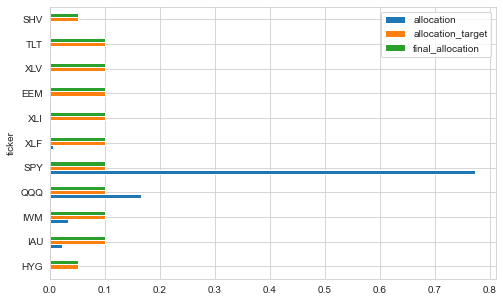

In [54]:
import matplotlib.pyplot as plt
graph_port = exec_port[['ticker','allocation','allocation_target','final_allocation']].copy()
graph_port.plot.barh(x='ticker',figsize=(8,5))
plt.show()

In [55]:
port = rebal.merge_drift_and_execution(start_port, exec_port)
port.head()

accounttype accountid ticker   shares assetclass   close         value  \
0         IRA      0003    HYG    3.140        ETF   72.40     227.33600   
1         IRA      0003    IAU  549.871        ETF   30.96   17024.00616   
2        401K      0002    IWM  151.578        ETF  176.30   26723.20140   
3         IRA      0001    QQQ  514.298        ETF  260.49  133969.48602   
4         IRA      0001    SPY  913.483        ETF  371.01  625482.04890   

   final_shares_chg  new_shares    new_value  new_value_chg  final_allocation  \
0             555.0     558.140  40409.33600       40182.00          0.049923   
1            2064.0    2613.871  80925.44616       63901.44          0.099979   
2             307.0     458.578  80847.30140       54124.10          0.099882   
3            -203.0     311.298  81090.01602      -52879.47          0.100182   
4           -1467.0     218.890  81210.37890     -544271.67          0.100331   

     value_orig  tick_alloc  
0     227.33600     1.00000  
1   17024.00616     1.00000  
2   26723.20140     1.00000  
3  133969.48602     1.00000  
4  338911.32783     0.54184

In [56]:
port = rebal.catch_edge_cases(port)
port.head()

accounttype accountid ticker   shares assetclass   close         value  \
0         IRA      0003    HYG    3.140        ETF   72.40     227.33600   
1         IRA      0003    IAU  549.871        ETF   30.96   17024.00616   
2        401K      0002    IWM  151.578        ETF  176.30   26723.20140   
3         IRA      0001    QQQ  514.298        ETF  260.49  133969.48602   
4         IRA      0001    SPY  913.483        ETF  371.01  338911.32783   

   final_shares_chg   new_shares    new_value  new_value_chg  final_allocation  
0        555.000000   558.140000  40409.33600    40182.00000          0.049923  
1       2064.000000  2613.871000  80925.44616    63901.44000          0.099979  
2        307.000000   458.578000  80847.30140    54124.10000          0.099882  
3       -203.000000   311.298000  81090.01602   -52879.47000          0.100182  
4       -794.879595   118.603405  44003.04916  -294908.27867          0.054363

# Options

In [57]:
import pandas as pd
from yahoo_fin import options
import QuantLib as ql
import datetime
ql.__version__

'1.27'

In [58]:
ticker = 'XLF'
dates = options.get_expiration_dates(ticker)
chain = options.get_options_chain(ticker)
calls, puts = chain['calls'], chain['puts']
# calls

In [59]:
tickers = ['XLF', 'XLE', 'IVV', 'QQQ', 'IBB']
data = {}
date_select = pd.to_datetime(options.get_expiration_dates(ticker)[5], format = '%B %d, %Y').strftime('%m/%d/%Y')
print(date_select)
for ticker in tickers:
    try:
        data[ticker] = {
            'dates':options.get_expiration_dates(ticker),
            'chain':options.get_options_chain(ticker, date_select)
            }
    except Exception:
        print(ticker + " failed")

12/09/2022


In [60]:
puts = data['XLF']['chain']['puts']
puts

Contract Name         Last Trade Date  Strike  Last Price   Bid  \
0   XLF221209P00025000   2022-11-03 1:53PM EDT    25.0        0.01  0.00   
1   XLF221209P00028500  2022-10-27 11:30AM EDT    28.5        0.14  0.06   
2   XLF221209P00029000  2022-10-27 10:14AM EDT    29.0        0.14  0.08   
3   XLF221209P00029500  2022-11-03 11:15AM EDT    29.5        0.15  0.11   
4   XLF221209P00030000  2022-11-03 10:01AM EDT    30.0        0.22  0.17   
5   XLF221209P00030500  2022-11-03 10:24AM EDT    30.5        0.26  0.21   
6   XLF221209P00031500   2022-10-28 3:52PM EDT    31.5        0.34  0.35   
7   XLF221209P00032000   2022-11-03 2:21PM EDT    32.0        0.50  0.49   
8   XLF221209P00033000   2022-11-03 3:50PM EDT    33.0        0.87  0.81   
9   XLF221209P00033500  2022-11-03 10:24AM EDT    33.5        1.14  1.02   
10  XLF221209P00034000  2022-11-03 10:52AM EDT    34.0        1.33  1.23   

     Ask  Change % Change Volume  Open Interest Implied Volatility  
0   0.04   -0.06  -85.71%      5              1             46.09%  
1   0.10    0.00        -      -              1             33.11%  
2   0.14    0.00        -      -             10             32.81%  
3   0.16    0.04  +36.36%     11             12             30.76%  
4   0.21    0.08  +57.14%     31             45             29.98%  
5   0.27   -0.01   -3.70%     26              4             29.05%  
6   0.47    0.00        -      6             14             28.03%  
7   0.58    0.11  +28.21%    239             45             26.81%  
8   0.94    0.33  +61.11%    217             13             25.73%  
9   1.18    0.27  +31.03%     26              2             25.39%  
10  1.54    0.31  +30.39%      5             14             27.05%

In [61]:
import yahoo_fin.stock_info as si
price = si.get_data("XLF")['close'].iloc[-1]
price

33.29999923706055

In [62]:
contract = puts[puts['Contract Name']=='XLF221209P00031500']
contract

Contract Name        Last Trade Date  Strike  Last Price   Bid   Ask  \
6  XLF221209P00031500  2022-10-28 3:52PM EDT    31.5        0.34  0.35  0.47   

   Change % Change Volume  Open Interest Implied Volatility  
6     0.0        -      6             14             28.03%

In [63]:
date = pd.to_datetime(date_select)

maturity_date = ql.Date(date.day, date.month, date.year)
spot_price = price
strike_price = contract['Strike'].values[0]
volatility = float(contract['Implied Volatility'].values[0].replace('%',''))/100
dividend_rate =  0
option_type = ql.Option.Put

risk_free_rate = 0.04
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

today = datetime.datetime.today()
calculation_date = ql.Date(today.day, today.month,  today.year)
ql.Settings.instance().evaluationDate = calculation_date

In [64]:
payoff = ql.PlainVanillaPayoff(option_type, strike_price)
settlement = calculation_date

In [65]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [66]:
am_exercise = ql.AmericanExercise(settlement, maturity_date)
american_option = ql.VanillaOption(payoff, am_exercise)
american_option

<QuantLib.QuantLib.VanillaOption; proxy of <Swig Object of type 'ext::shared_ptr< VanillaOption > *' at 0x000001E78E4E7CC0> >

In [67]:
steps = 200
binomial_engine = ql.BinomialVanillaEngine(bsm_process, "crr", steps)
american_option.setPricingEngine(binomial_engine)
american_option.NPV()

0.42668196229966604

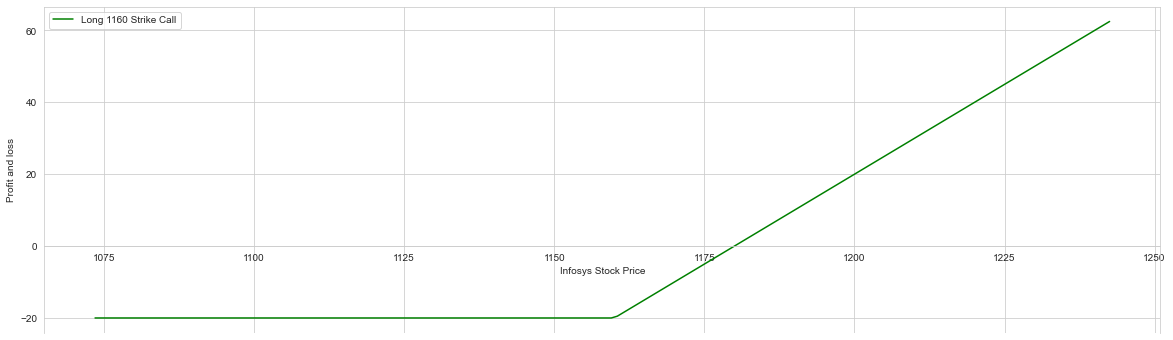

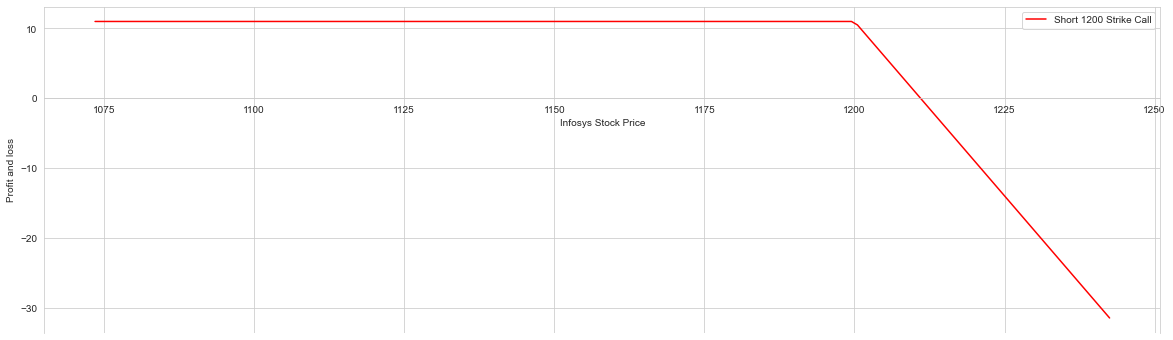

Max Profit: 31.0
Max Loss: -9.0


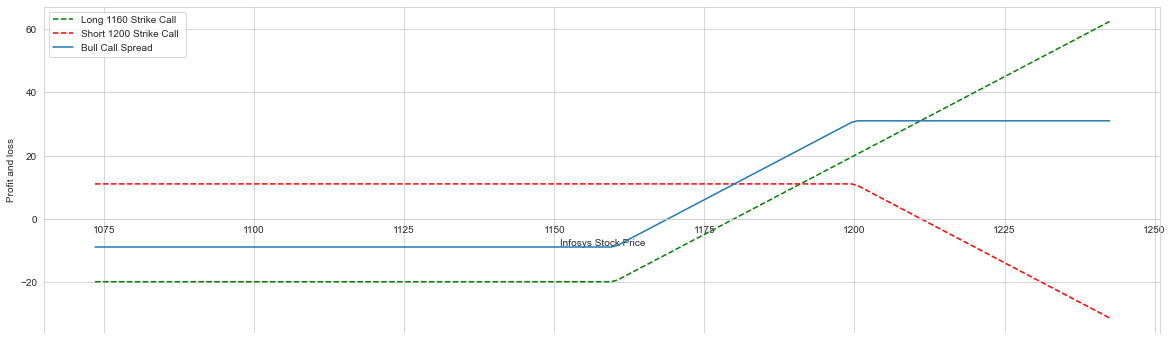

In [68]:
# from lib.derivatives.options.strategies import bull_call_spread as bcs
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, sT - strike_price, 0) - premium

spot_price = 1130
strike_price_long_call = 1160
premium_long_call = 20
strike_price_short_call = 1200
premium_short_call = 11
sT = np.arange(0.95*spot_price,1.1*spot_price,1)


payoff_long_call = call_payoff(sT, strike_price_long_call, premium_long_call)
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,label='Long 1160 Strike Call',color='g')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


payoff_short_call = call_payoff(sT, strike_price_short_call, premium_short_call) * -1.0
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_short_call,label='Short 1200 Strike Call',color='r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()


payoff_bull_call_spread = payoff_long_call + payoff_short_call

print("Max Profit:", max(payoff_bull_call_spread))
print ("Max Loss:", min(payoff_bull_call_spread))
# Plot
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
ax.plot(sT,payoff_long_call,'--',label='Long 1160 Strike Call',color='g')
ax.plot(sT,payoff_short_call,'--',label='Short 1200 Strike Call ',color='r')
ax.plot(sT,payoff_bull_call_spread,label='Bull Call Spread')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()